#### Data Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

file_path = 'data/aps_failure_set.csv'
data_df = pd.read_csv(file_path)
data_df.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


#### Data Types and Missing Values

In [2]:
corrupt_values = ["NA", "N/A", "-", "NaN", "missing", "na", "?"]
data_df = pd.read_csv('data/aps_failure_set.csv', na_values=corrupt_values)
missing_values = data_df.isnull().sum()
data_df = data_df.fillna(np.nan)
data_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


#### Exploratory Data Analysis (EDA) 

##### Visualization
###### Creating "My Report" has been useful to understand the data and create various visualizations to better decide how to handle the missing data, outliers, and constant abservations. 

In [3]:
from ydata_profiling import ProfileReport
slice_data_df = data_df.iloc[:, :10]
report = ProfileReport(data_df, title='My Data', minimal=True)
report.to_file("my_report.html")

#### Visualize class column

<Axes: xlabel='class'>

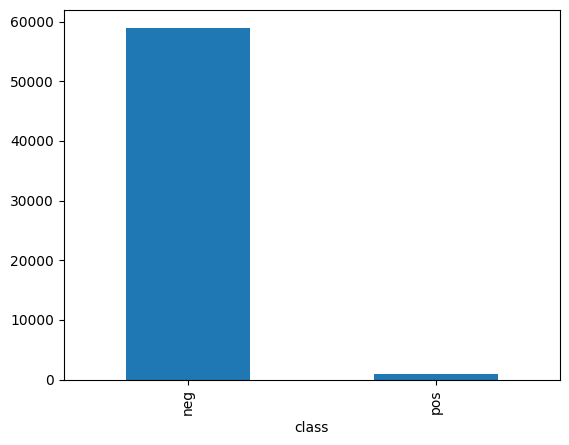

In [4]:
data_df['class'].value_counts().plot(kind='bar')

###### The dataset has much more negative examples than positive

##### Remove Constant Features
###### The Report I created showed me I have a constant Column cd_000 which I proceed to remove

In [5]:
if data_df['cd_000'].nunique() == 1:
    data_df.drop(columns=['cd_000'], inplace=True)

##### Handle Missing Values
###### I proceeded to handle the missing values: For features with a percentage less than 30% of missing values I used the mean. For all those with more than 30% I used the median.

In [6]:
numerical_columns = data_df.select_dtypes(include=['number']).columns
missing_threshold = 0.30
for col in numerical_columns:
    missing_percentage = data_df[col].isnull().mean() * 100
    
    if missing_percentage < missing_threshold:
        data_df[col].fillna(data_df[col].mean(), inplace=True)
    else:
        data_df[col].fillna(data_df[col].median(), inplace=True)

##### Outliers Detection
###### Detecting 3 observations with outliers thanks to My Report Histograms and visualise them also with a bloxplot

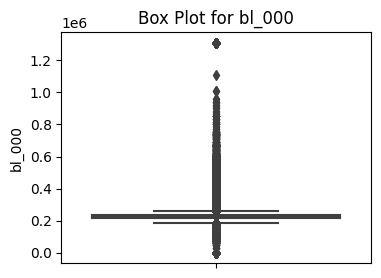

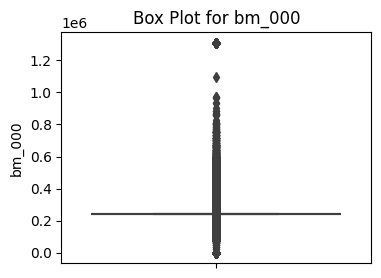

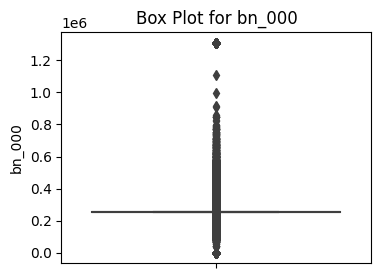

In [7]:
outliers = ['bl_000', 'bm_000', 'bn_000']

for col in outliers:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data=data_df, y=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

#### PCA


In [8]:
l_encoder = LabelEncoder()
data_df["class"] = l_encoder.fit_transform(data_df["class"])
data_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [9]:
# Fit PCA to your data (assuming you've already done this)
pca= PCA().fit(data_df.drop(data_df["class"]))

# Create the cumulative explained variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [10]:
cumulative_variance

array([0.97450442, 0.9892327 , 0.99518407, 0.99826926, 0.99948376,
       0.99965959, 0.99977366, 0.99981867, 0.99984807, 0.99987323,
       0.99989323, 0.99990908, 0.99992346, 0.99993542, 0.99994409,
       0.99995154, 0.99995667, 0.99996102, 0.99996506, 0.99996786,
       0.99997056, 0.99997282, 0.99997482, 0.99997678, 0.99997856,
       0.99998029, 0.99998182, 0.99998324, 0.99998452, 0.99998568,
       0.9999867 , 0.99998764, 0.99998852, 0.99998937, 0.99999015,
       0.99999083, 0.99999145, 0.99999203, 0.9999926 , 0.99999311,
       0.99999359, 0.99999406, 0.99999448, 0.9999949 , 0.99999529,
       0.99999566, 0.99999599, 0.9999963 , 0.9999966 , 0.99999687,
       0.99999713, 0.99999736, 0.99999756, 0.99999775, 0.99999794,
       0.99999811, 0.99999826, 0.9999984 , 0.99999853, 0.99999866,
       0.99999877, 0.99999887, 0.99999896, 0.99999904, 0.99999911,
       0.99999918, 0.99999924, 0.99999931, 0.99999937, 0.99999943,
       0.99999948, 0.99999952, 0.99999956, 0.9999996 , 0.99999

In [11]:
# Find the index where the cumulative variance is >= 0.995 (99.5%)
num_components_needed = np.argmax(cumulative_variance >= 0.995)

In [12]:
num_components_needed

2

###### since the index starts from 0 we know that with just 3 features we can explain more than 99.5% of the variance

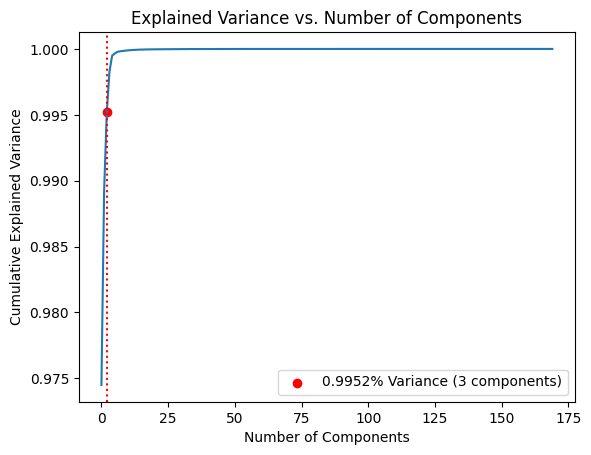

Number of components needed to retain 99.5% variance: 3


In [13]:
# Plot the cumulative explained variance
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')

# Add a vertical line on the number of components needed
plt.axvline(x=num_components_needed, color='red', linestyle='dotted')

# Add a marker to the plot in the intersection point
plt.scatter(num_components_needed, cumulative_variance[num_components_needed], color='red', label=f'{round(cumulative_variance[num_components_needed], 4)}% Variance ({num_components_needed+1} components)')
plt.legend()

plt.show()

# num_components_needed contains the number of components needed to retain 99.5% variance
print(f"Number of components needed to retain 99.5% variance: {num_components_needed+1}")


###### Use the pca to reduce the number of components

In [14]:
pca_m = PCA(3)
projected = pca_m.fit_transform(data_df)
projected_df = pd.DataFrame(projected, columns=['c1', 'c2', 'c3'])

In [15]:
# lets add the class column
projected_df['class'] = data_df['class']

In [16]:
projected_df.head()

,c1,c2,c3,class
0,1.794494e+09,3.188461e+05,-14217.659518,0
1,-3.361925e+08,-5.373781e+06,-283887.227290,0
2,-3.361920e+08,-5.627204e+06,-276666.674242,0
3,-3.361691e+08,-6.271391e+06,-262922.691208,0
4,-3.362450e+08,-4.904796e+06,-310152.073200,0


###### The data are ready to train a classifier model

###### Following the notes in the class we can try to check the perfomance of different classification model

In [17]:
from sklearn.model_selection import train_test_split
array_df = projected_df.values
X = array_df[:,0:3]
y = array_df[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [19]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [20]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.268979 (0.241689)
LDA: 0.981625 (0.003159)
KNN: 0.982771 (0.001617)
CART: 0.980500 (0.002189)
NB: 0.255646 (0.240808)


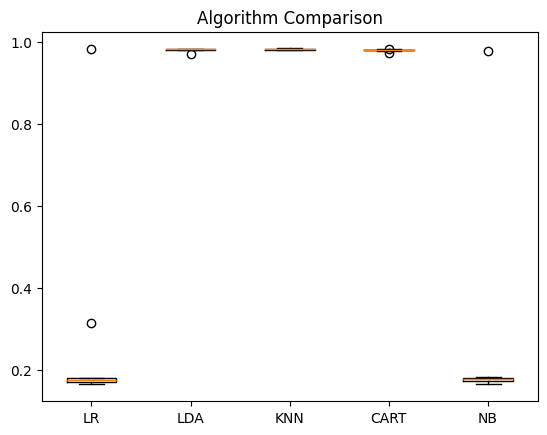

In [21]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

#### Curse of Dimensionality
###### It's important to talk about the Curse of Dimensionality and the correlation between this and the PCA. Whenever we have a high number of features or dimensions of the dataset, more probabilities we will have to get a sparse data, far away between them, making very difficult to find patterns and relationships in the data. The scope of the PCA, which is an unsupervised transformation, is to reduce the dimension of the dataset and find a new way to represent the data that summarizes the essential charateristics with fewer features. The Curse of Dimensionality deals with those high dimensional data problems and the importance and beneficts to reduce the data to two or three dimensions for visualization purposes.


#### Conlcusions
###### Since I started with Data Types and Missing Values, I converted them into numerical values and discovered that there were a lot of features that required further attention. For academical reasons and to avoid complex excersice choises, I decided to simply fill the null values with median for all those features which had more than 30% of missing values, and with the mean for all those with less than 30%.

###### Following that I used a very helpful library which showed me an overview with how many features were highly skewed, missing values for each feature, and detect a constant column cd_000 which I proceed to remove. Later on, checking on My Report, I decided to visualise some random features with a boxplot. It was another clear evidence that those features, and some much more, weren't useful to reach the goal of this project. Nevertheless, I decided to keep them because one the main purposes of the project is to demonstrate how PCA can reduce the dimensionality of a large dataset and for this reason, on several occasions, I chose to analyze the dataset without removing columns and rows that I actually thought it was necessary to handle or remove.

###### I fitted the PCA to my data and I created the cumulative explained variance plot which showed me up 0.99518407 as third value. Since the index starts from 0, I used num_components_needed +1, to print the exact number of features we needed. Subsequently, I carried out one of the most important steps, which is the PCA. As evident from the final result, I think the objective has been achieved. Lastly, I showed how the "fit_transform" function was able to "transform" or "project" my original dataset into a three-dimensional space based on these three principal components. The result was stored in the variable "projected." As demonstrated with the new dataset "projected_df," we finally obtained the three new components, which we subsequently used to train various types of classification models that I decided to include.

#### References
###### Müller, A.C. and Guido, S. (2018) Introduction to machine learning with python: A guide for data scientists. Sebastopol: O’Reilly Media.

###### McKinney, W. (2022) Python for Data Analysis: Data wrangling with pandas, NumPy, and Jupyter. Beijing: O’Reilly.

###### CCT College Dublin: Available at: https://moodle.cct.ie/course/view.php?id=2623.

###### Team, B. (2020) The why, when and how of 3D PCA, Medium. Available at: https://bioturing.medium.com/the-why-when-and-how-of-3d-pca-bdb5c209f693.

###### Mahajan, S. (2023) 12 data plot types for visualization from concept to code, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/12/12-data-plot-types-for-visualization/.